In [105]:
#packages:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt


Years: 2000-2012

In [106]:
df1=pd.read_csv("F:\project\Singapore_flat_resale_project\ResaleFlatPricesBasedonApprovalDate2000Feb2012 (1).csv")

In [ ]:
df1.head(2)

In [ ]:
df1.columns

#"remaining_lease" column is missing between the years 2000 and 2012#

Years: January 2015 to December 2016

In [107]:
df2=pd.read_csv("F:\project\Singapore_flat_resale_project\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016 (1).csv")

In [ ]:
df2.head(2)

In [ ]:
df2.columns

Years: January 2017 Onwards

In [108]:
df3=pd.read_csv("F:\project\Singapore_flat_resale_project\ResaleflatpricesbasedonregistrationdatefromJan2017onwards (1).csv")
df3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [ ]:
df3.columns

Concatinatinf the dataframes df2 and df3.

In [109]:
df= pd.concat([df2,df3],axis= 0)
df.reset_index(drop= True, inplace= True)
df.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
216128,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,62 years 11 months,998000.0
216129,2024-03,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,62 years 09 months,1200000.0


In [ ]:
df.info()

In [ ]:
df.isnull().sum().sum()

This Dataset doesn't have any null values.

Changing the Datatypes.

In [110]:
#changing the datatype of month

df["month"]=pd.to_datetime(df["month"],format="%Y-%m")

In [111]:
df["year"]=df["month"].dt.year
df["month"]=df["month"].dt.month


In [112]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
0,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,2015
1,1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,2015


In [113]:
df["address"]=df["block"]+" "+df["street_name"]

In [114]:
df=df.drop(columns=["block","street_name"])

In [115]:
df["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [116]:
df["town"].nunique()

26

In [117]:
df["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [118]:
df["flat_type"].nunique()

7

In [119]:
df["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [120]:
df["flat_model"].nunique()

21

In [121]:
#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [122]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df["town"]= LabelEncoder().fit_transform(df["town"])
df["flat_model"]= OrdinalEncoder().fit_transform(df[["flat_model"]])
df["flat_type"]= OrdinalEncoder().fit_transform(df[["flat_type"]])

In [123]:
df.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,address
0,1,0,2.0,07 TO 09,60.0,5.0,1986,70,255000.0,2015,174 ANG MO KIO AVE 4
1,1,0,2.0,01 TO 03,68.0,12.0,1981,65,275000.0,2015,541 ANG MO KIO AVE 10


In [124]:
df["address"].nunique()

9585

In [125]:
df["address"]= LabelEncoder().fit_transform(df["address"])

In [126]:
df.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,address
0,1,0,2.0,07 TO 09,60.0,5.0,1986,70,255000.0,2015,1634
1,1,0,2.0,01 TO 03,68.0,12.0,1981,65,275000.0,2015,6592


In [127]:
df[["storey_start", "storey_end"]]= df["storey_range"].str.split(" TO ",expand=True)

In [128]:
#droping the "storey_range" column
df.drop(columns=["storey_range"],inplace= True)

In [129]:
df.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,address,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,2015,1634,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,2015,6592,01,03


In [130]:
df.dtypes

month                    int32
town                     int32
flat_type              float64
floor_area_sqm         float64
flat_model             float64
lease_commence_date      int64
remaining_lease         object
resale_price           float64
year                     int32
address                  int32
storey_start            object
storey_end              object
dtype: object

In [131]:
df["storey_start"]= df["storey_start"].astype(int)
df["storey_end"]= df["storey_end"].astype(int)

In [132]:
a= []
for i in df["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    a.append(n)

In [133]:
df_1= pd.DataFrame(a,columns=["remaining_lease_year", "remaining_lease_month"])

In [134]:
df_1["remaining_lease_year"]= df_1["remaining_lease_year"].astype(int)
df_1["remaining_lease_month"]= df_1["remaining_lease_month"].fillna(0).astype(int)

In [135]:
#droping the "remaining_lease" column
df.drop(columns=["remaining_lease"],inplace= True)

In [136]:
df=pd.concat([df,df_1],axis=1)

In [137]:
# set the columns
df= df[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [138]:
df.to_csv("ResaleFlatPrices.csv", index= False)

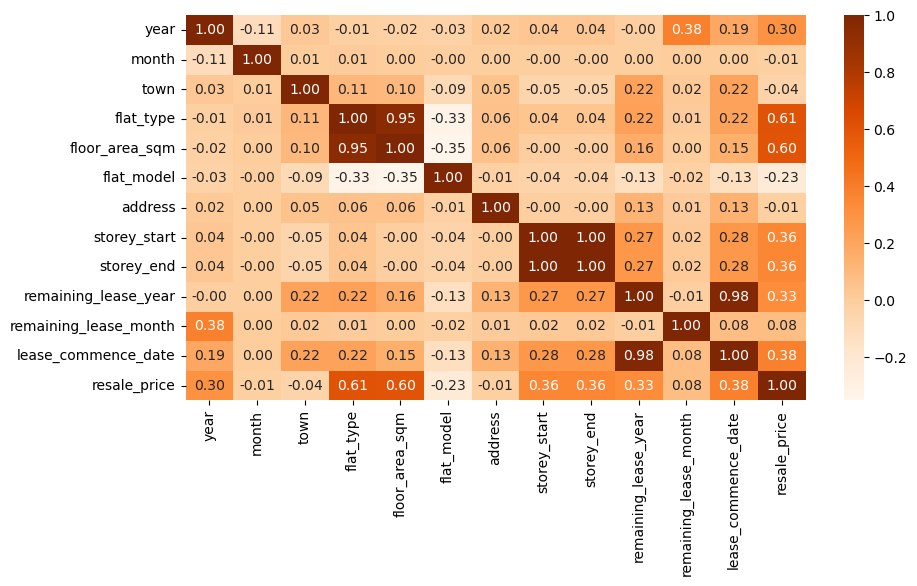

In [140]:
# Checking the Correlation using heatmap

df_corr= df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_corr,annot= True, cmap="Oranges", fmt=".2f")
plt.show()

In [142]:
df=pd.read_csv("F:\project\Singapore_flat_resale_project\ResaleFlatPrices.csv")
df.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1634,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6592,1,3,65,0,1981,275000.0


In [143]:
#checking duplicated values
df.duplicated().sum()

308

In [144]:
df_1= df.drop_duplicates()
df_1.reset_index(drop= True, inplace= True)

In [145]:
df_1.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
215820,2024,2,25,6.0,164.0,11.0,7729,4,6,62,11,1987,998000.0
215821,2024,3,25,6.0,164.0,11.0,7729,10,12,62,9,1987,1200000.0


The month, address columns have very lowest correlation with other features,
So month and address columns can be dropped

In [147]:
df_2= df_1.drop(columns=["month","address"])
df_2.head(2)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,0,2.0,60.0,5.0,7,9,70,0,1986,255000.0
1,2015,0,2.0,68.0,12.0,1,3,65,0,1981,275000.0


In [149]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,215822.0,2019.566337,2.662074,2015.0,2017.0,2020.0,2022.0,2024.0
town,215822.0,13.895025,7.957067,0.0,8.0,14.0,21.0,25.0
flat_type,215822.0,3.121498,0.919192,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,215822.0,97.153075,24.056551,31.0,82.0,94.0,112.0,280.0
flat_model,215822.0,8.693043,3.648029,0.0,5.0,8.0,12.0,20.0
storey_start,215822.0,7.657347,5.844290,1.0,4.0,7.0,10.0,49.0
storey_end,215822.0,9.657347,5.844290,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,215822.0,74.115252,13.459394,41.0,63.0,74.0,85.0,97.0
remaining_lease_month,215822.0,4.592298,3.783404,0.0,1.0,4.0,8.0,11.0
lease_commence_date,215822.0,1995.117073,13.665926,1966.0,1985.0,1995.0,2005.0,2022.0


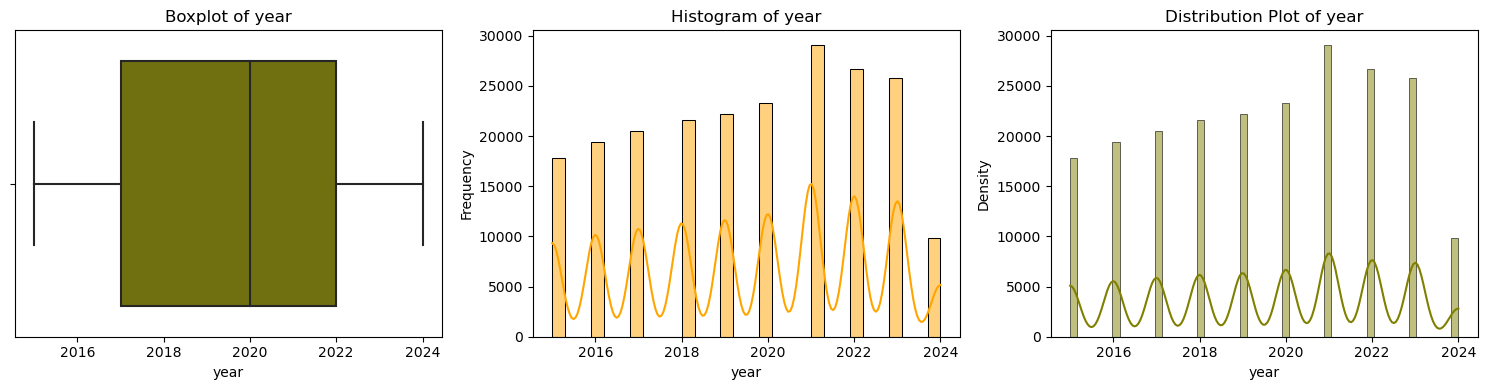

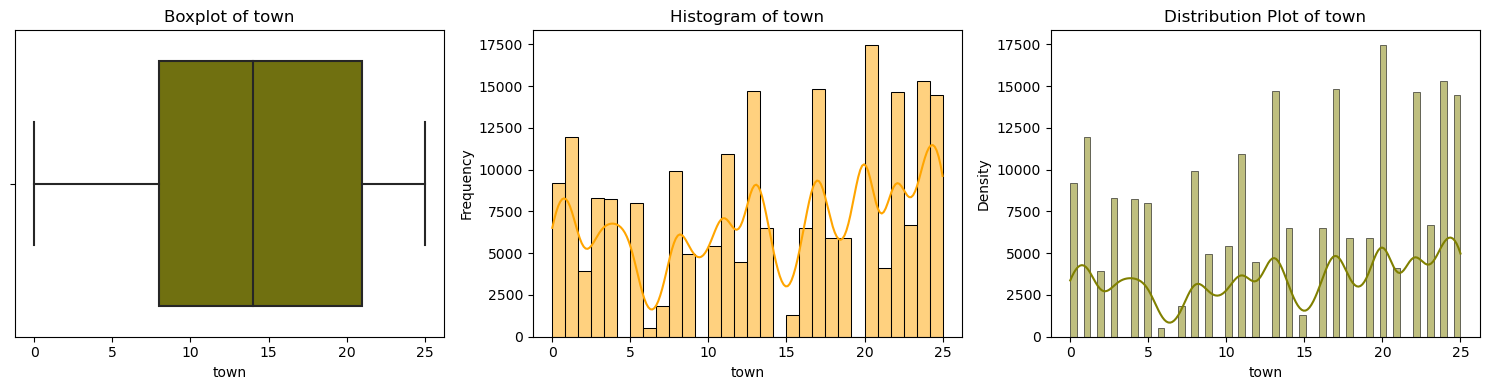

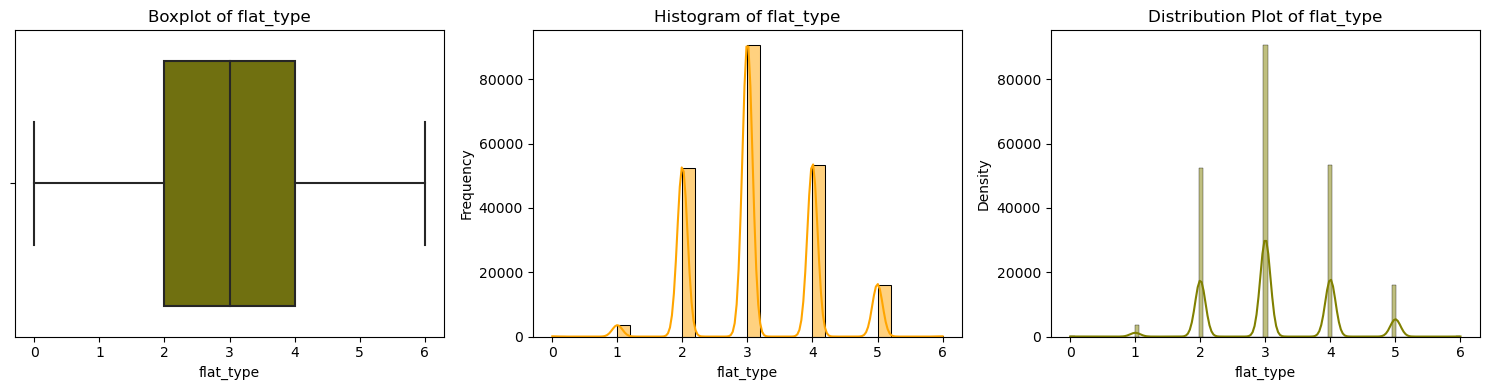

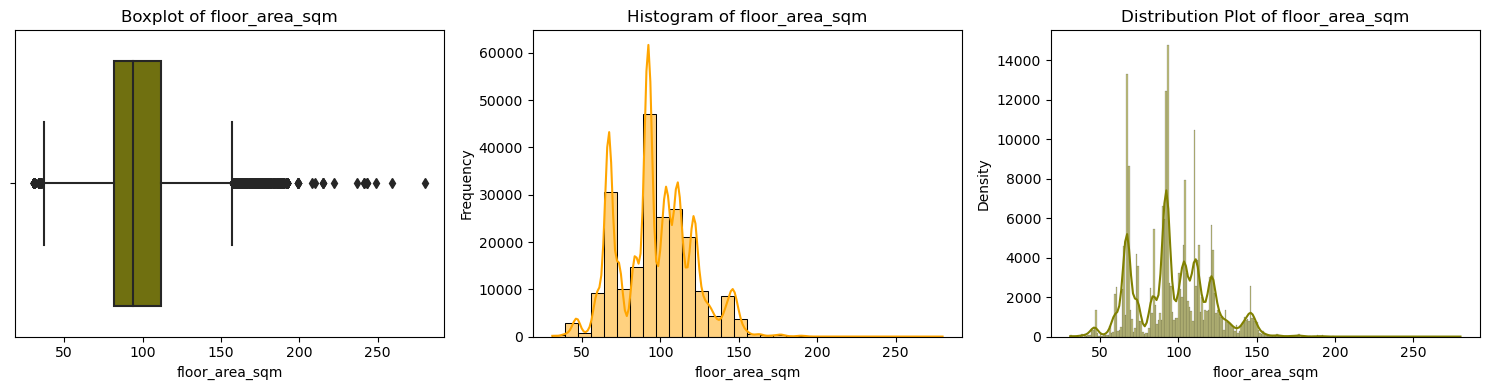

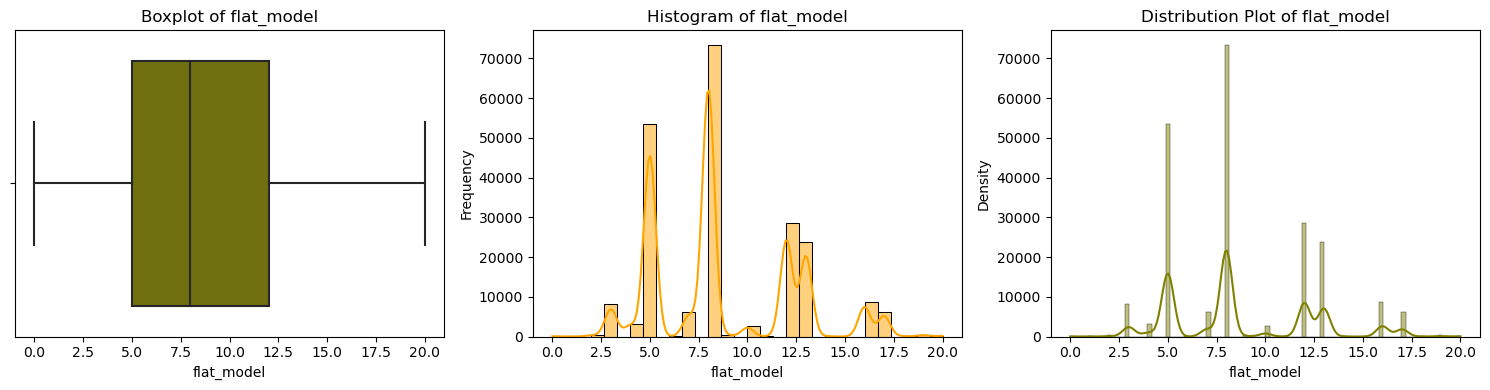

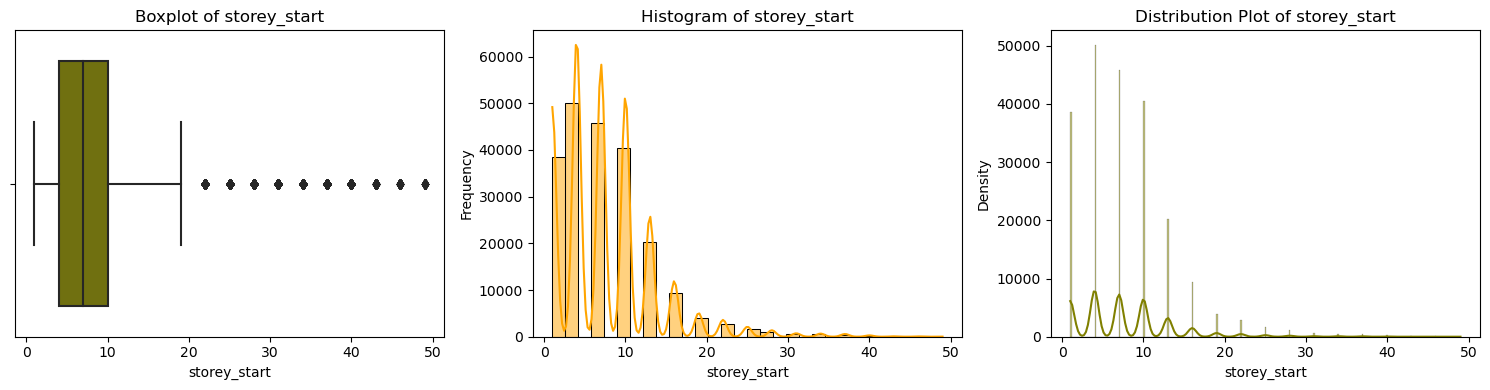

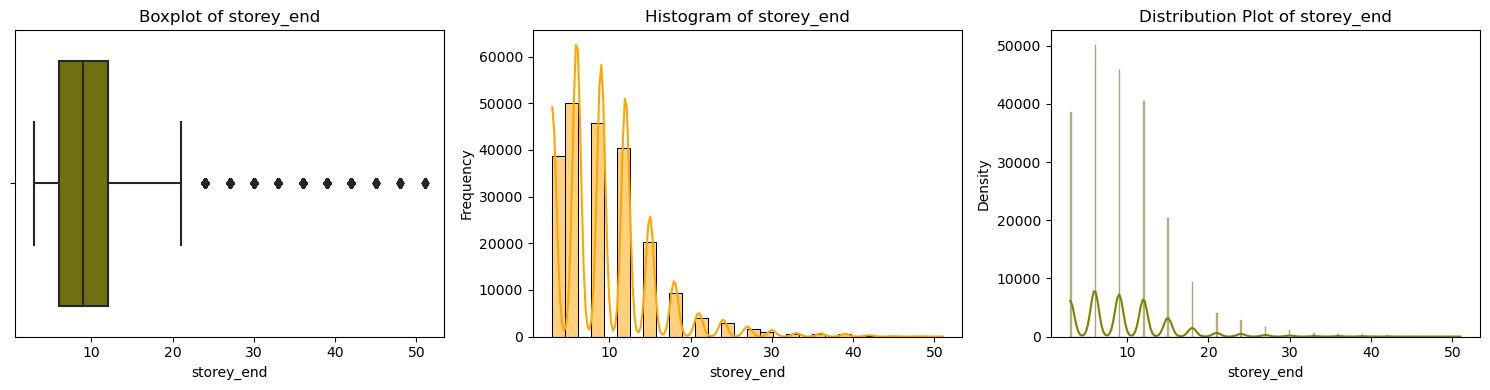

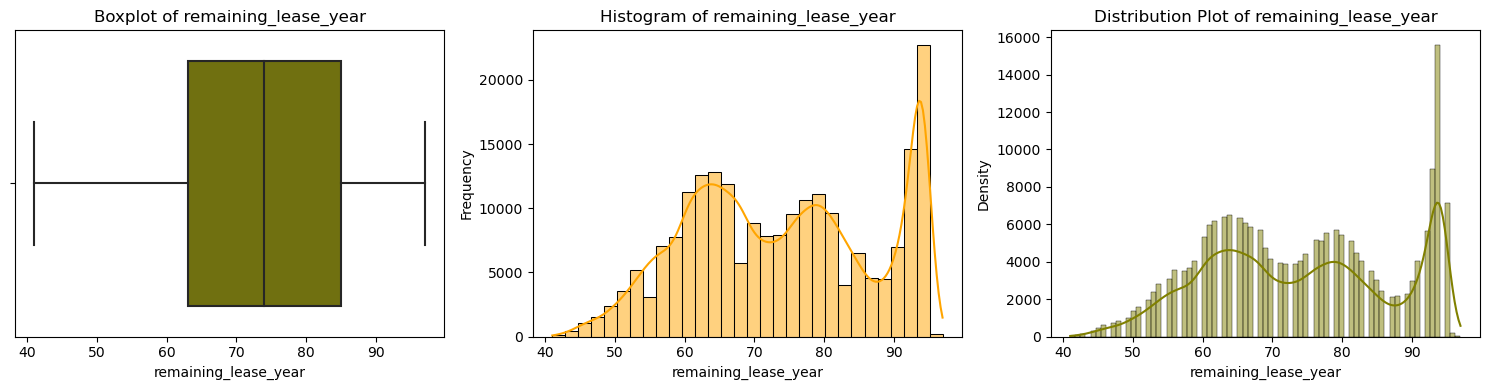

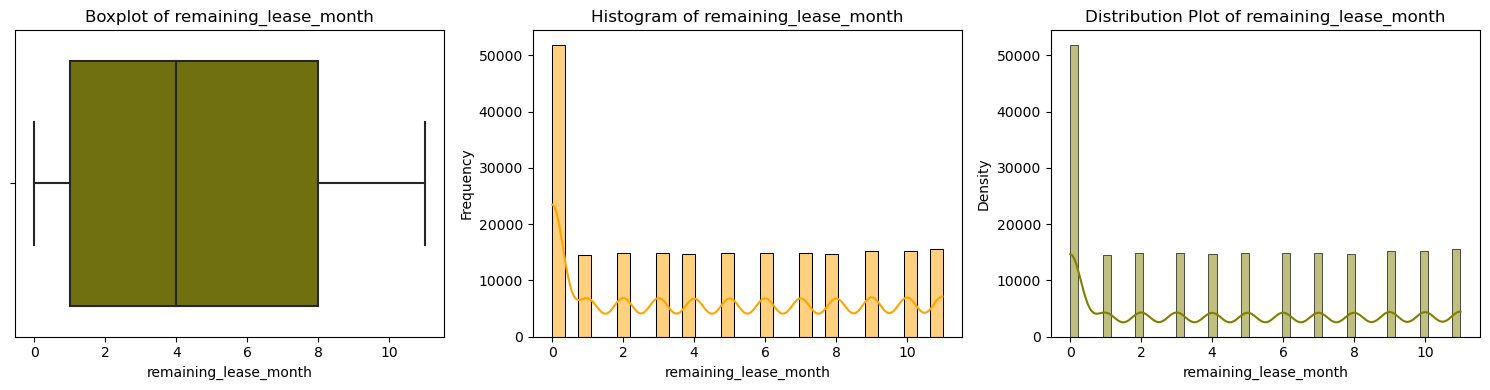

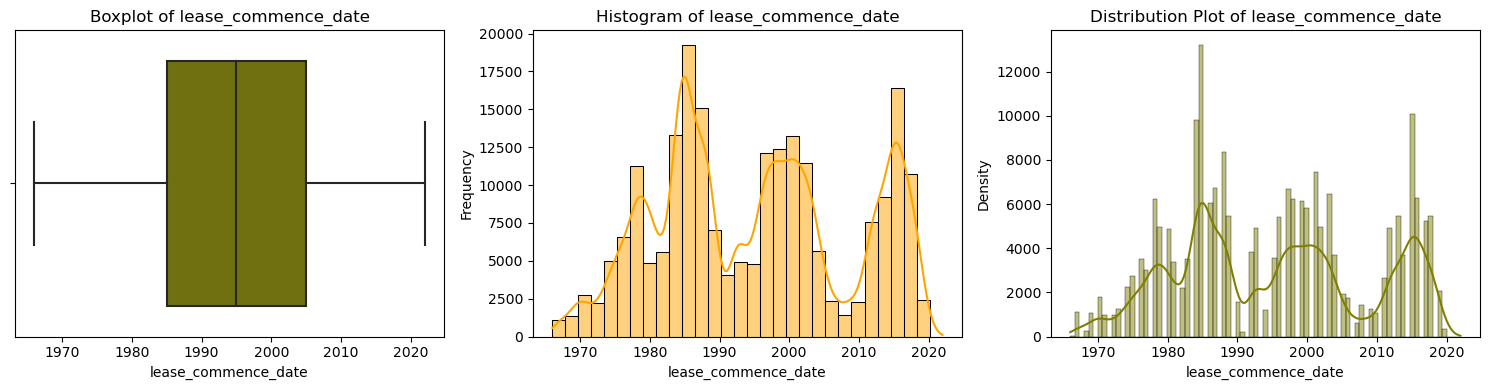

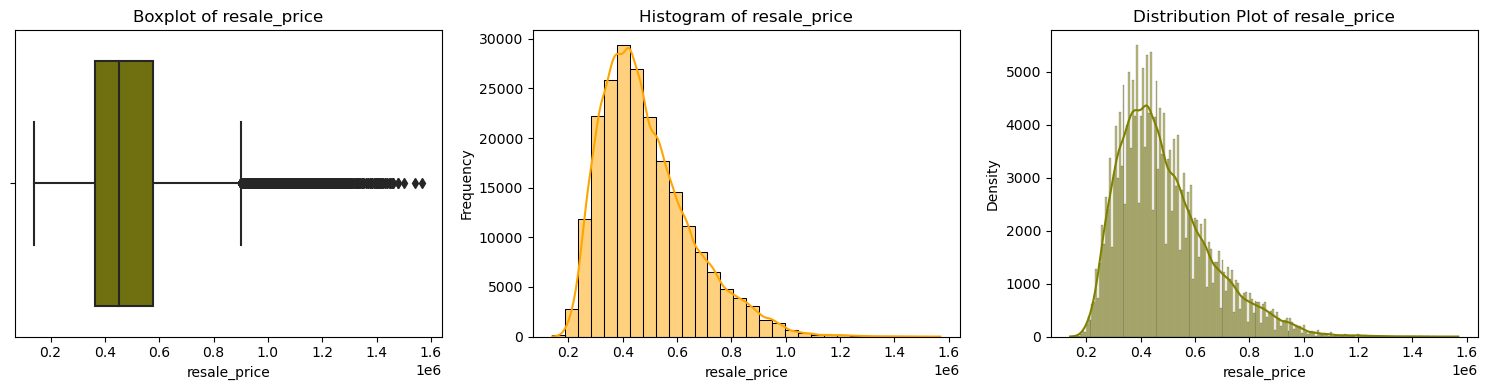

In [162]:
# List of columns for finding skewness
col = ['year', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'storey_start', 
       'storey_end', 'remaining_lease_year', 'remaining_lease_month', 'lease_commence_date', 'resale_price']

# Loop through each column to create plots
for i in col:
    plt.figure(figsize=(15, 4))  # Create a new figure for each column
    
    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df, x=i,color="olive")
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    
    # Histogram
    plt.subplot(1, 3, 2)
    sns.histplot(data=df, x=i, kde=True,bins=30,color="orange")
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    
    # Distribution Plot
    plt.subplot(1, 3, 3)
    sns.histplot(df[i], kde=True,color="olive")
    plt.title(f'Distribution Plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Density')
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the combined plot for the current column
    plt.show()

In [ ]:
# The Skewness Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. storey_end
# 4. resale_price

In [164]:
df_log = df.copy()

In [165]:
df_log["floor_area_sqm"]= np.log(df_log["floor_area_sqm"])
df_log["storey_start"]= np.log(df_log["storey_start"])
df_log["storey_end"]= np.log(df_log["storey_end"])
df_log["resale_price"]= np.log(df_log["resale_price"])

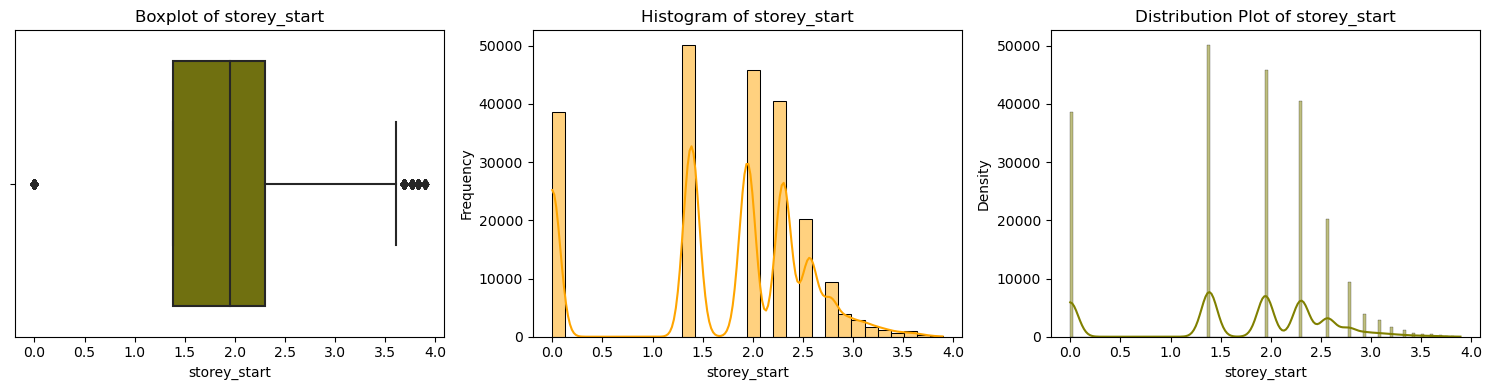

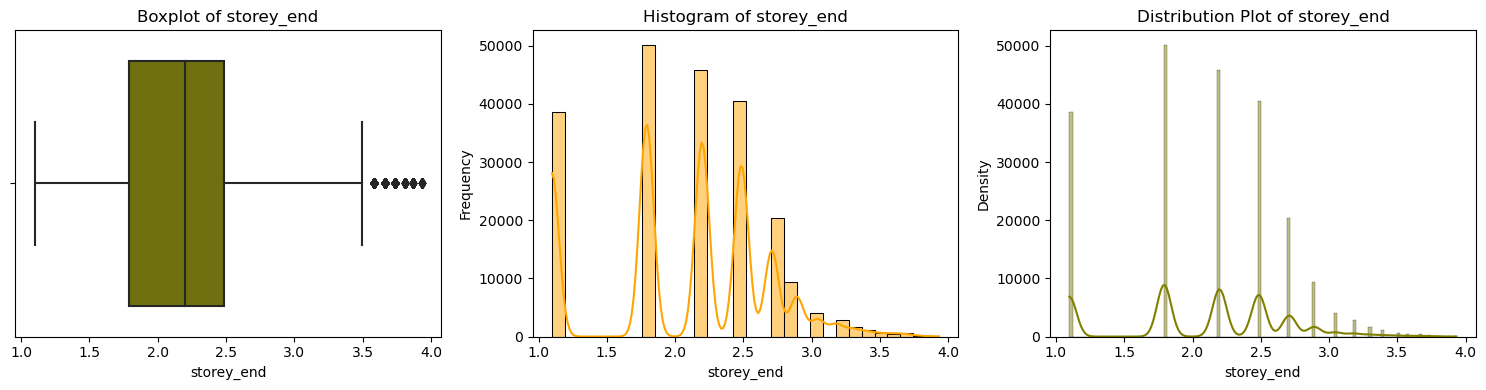

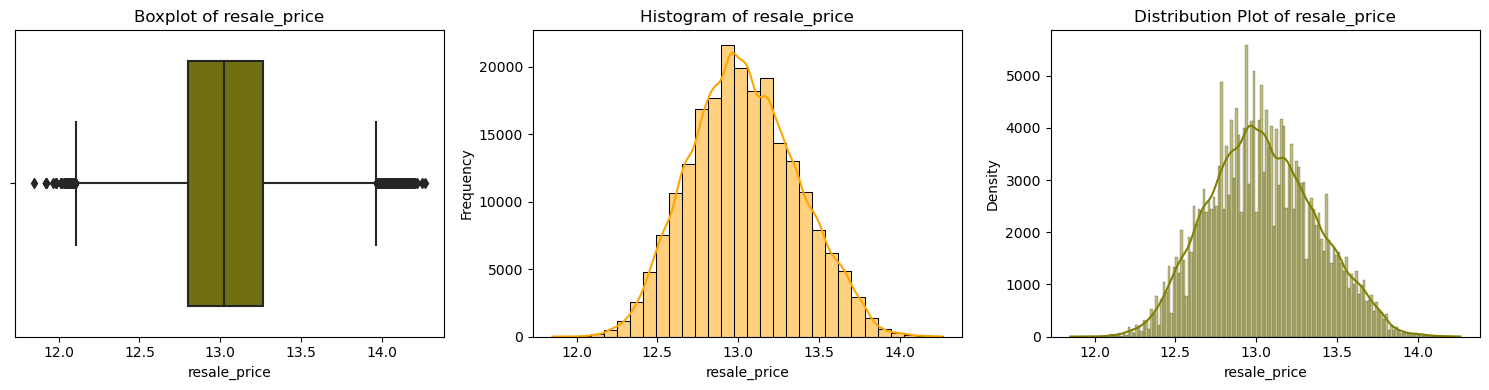

In [168]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plt.figure(figsize=(15, 4))  # Create a new figure for each column
    
    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df_log, x=i,color="olive")
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    
    # Histogram
    plt.subplot(1, 3, 2)
    sns.histplot(data=df_log, x=i, kde=True,bins=30,color="orange")
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    
    # Distribution Plot
    plt.subplot(1, 3, 3)
    sns.histplot(df_log[i], kde=True,color="olive")
    plt.title(f'Distribution Plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()
    

Outliers Handling - InterQuartile Range

In [ ]:
# The Outlier Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price
# Recorrect the Outliers

# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [169]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [170]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df,j)

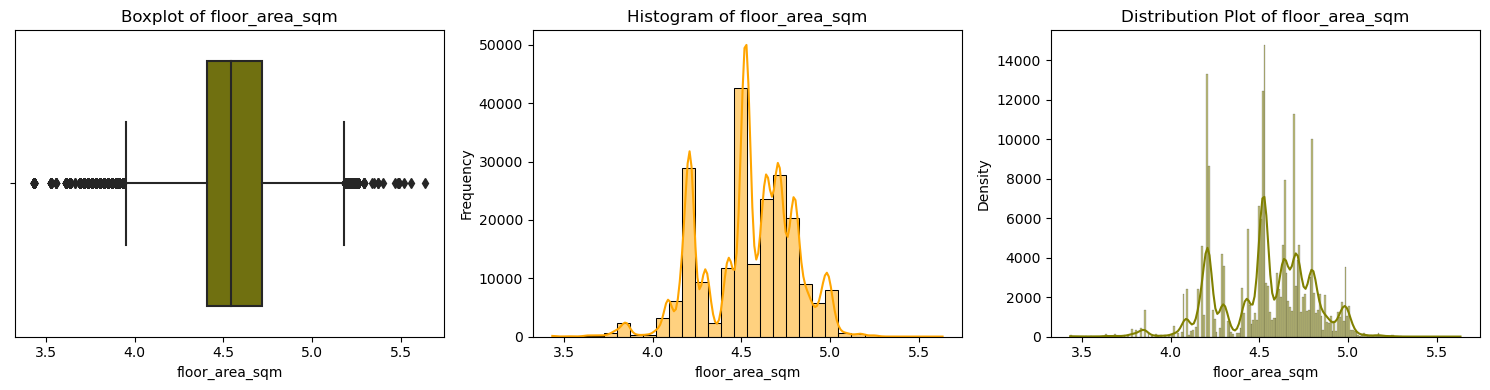

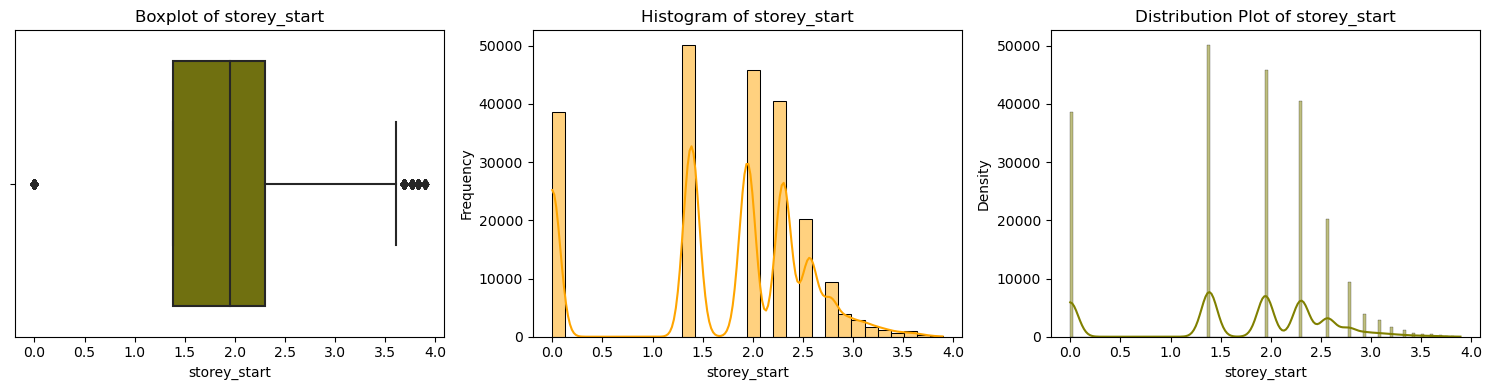

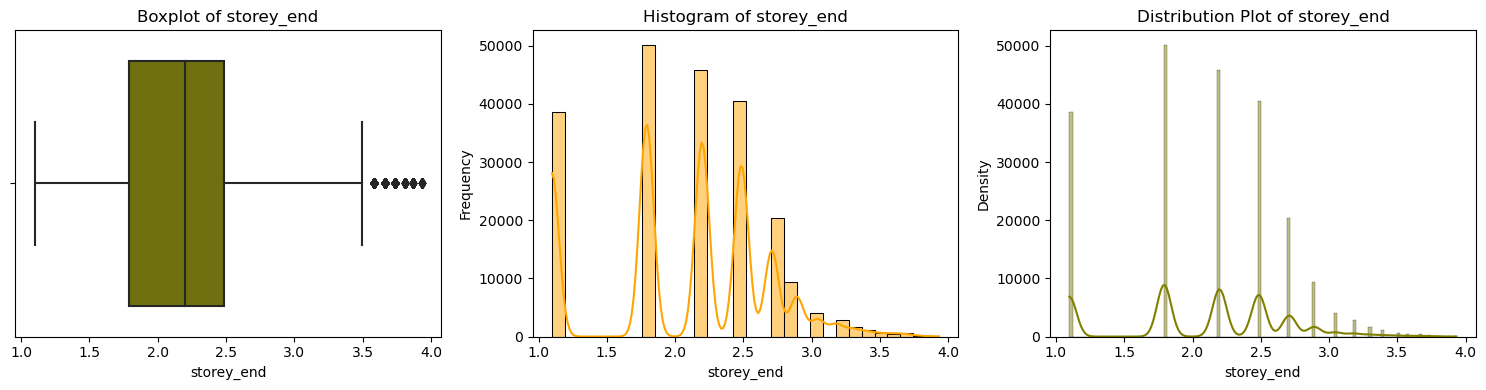

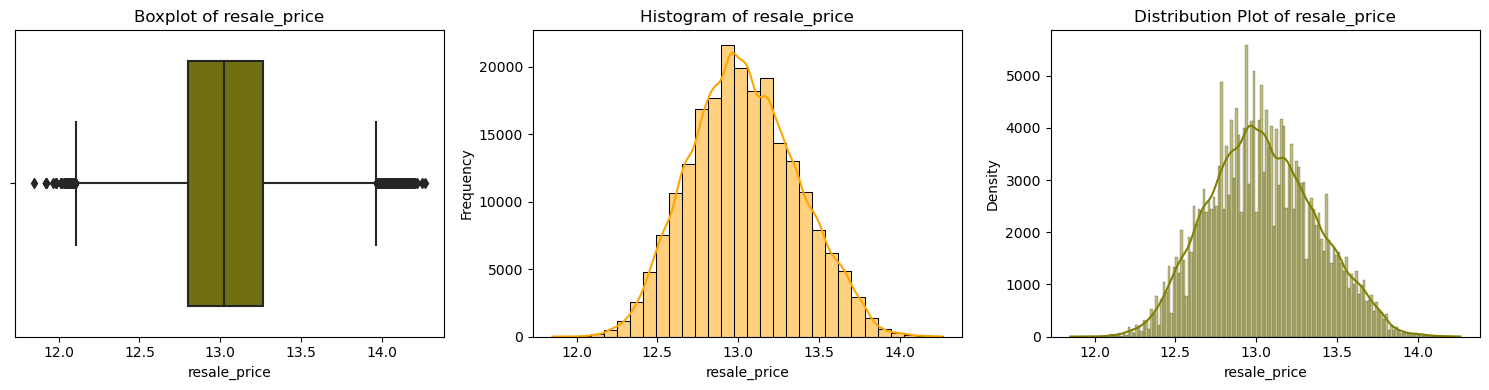

In [184]:
for k in outlier_columns:
    plt.figure(figsize=(15, 4))  # Create a new figure for each column
    
    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df_log, x=k,color="olive")
    plt.title(f'Boxplot of {k}')
    plt.xlabel(k)
    
    # Histogram
    plt.subplot(1, 3, 2)
    sns.histplot(data=df_log, x=k, kde=True,bins=30,color="orange")
    plt.title(f'Histogram of {k}')
    plt.xlabel(k)
    plt.ylabel('Frequency')
    
    # Distribution Plot
    plt.subplot(1, 3, 3)
    sns.histplot(df_log[k], kde=True,color="olive")
    plt.title(f'Distribution Plot of {k}')
    plt.xlabel(k)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()
    

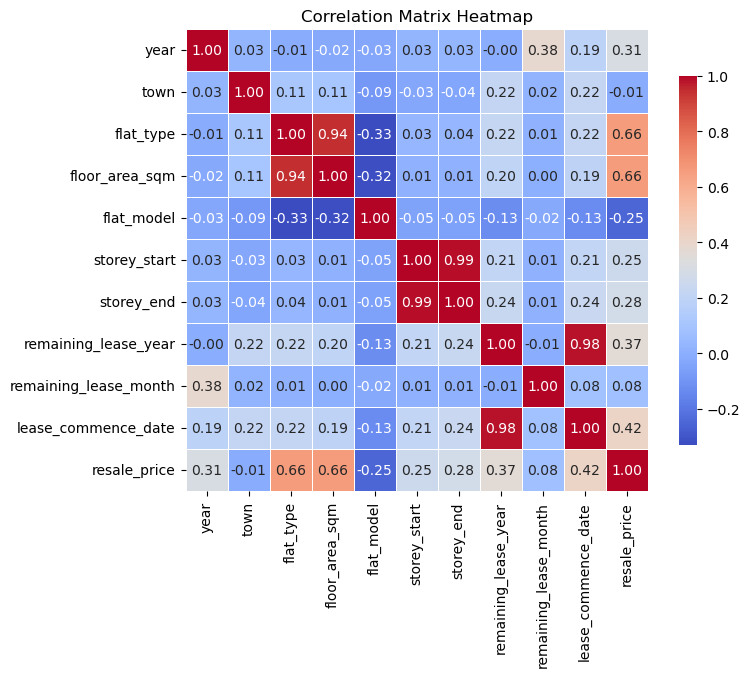

In [181]:
# Compute the correlation matrix
corr_matrix = df_log[col].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8}, square=True, linewidths=.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [186]:
df_final=df_log.copy()
df_final.head()

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,4.094345,5.0,1634,1.94591,2.197225,70,0,1986,12.449019
1,2015,1,0,2.0,4.219508,12.0,6592,0.00000,1.098612,65,0,1981,12.524526
2,2015,1,0,2.0,4.234107,12.0,1465,0.00000,1.098612,64,0,1980,12.560244
3,2015,1,0,2.0,4.219508,12.0,5432,0.00000,1.098612,63,0,1979,12.577636
4,2015,1,0,2.0,4.219508,12.0,6746,1.94591,2.197225,64,0,1980,12.577636


In [187]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
year,216130.0,2019.564447,2.661894,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
month,216130.0,6.510693,3.419222,1.000000,4.000000,7.000000,9.000000,12.000000
town,216130.0,13.894480,7.956686,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,216130.0,3.121358,0.918969,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,216130.0,4.544252,0.257425,3.433987,4.406719,4.543295,4.718499,5.634790
flat_model,216130.0,8.693712,3.647847,0.000000,5.000000,8.000000,12.000000,20.000000
address,216130.0,4784.981937,2736.972579,0.000000,2380.000000,4795.000000,7158.000000,9584.000000
storey_start,216130.0,1.693716,0.924779,0.000000,1.386294,1.945910,2.302585,3.891820
storey_end,216130.0,2.094296,0.603341,1.098612,1.791759,2.197225,2.484907,3.931826
remaining_lease_year,216130.0,74.121228,13.462038,41.000000,63.000000,74.000000,85.000000,97.000000


In [192]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 325.1 kB/s eta 0:05:07
   ---------------------------------------- 0.1/99.8 MB 465.5 kB/s eta 0:03:35
   ---------------------------------------- 0.1/99.8 MB 595.3 kB/s eta 0:02:48
   ---------------------------------------- 0.1/99.8 MB 655.8 kB/s eta 0:02:32
   ---------------------------------------- 0.2/99.8 MB 737.3 kB/s eta 0:02:16
   ---------------------------------------- 0.2/99.8 MB 758.5 kB/s eta 0:02:12
   ---------------------------------------- 0.3/99.8 MB 842.9 kB/s eta 0:01:58
   -----------------------------

In [193]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [196]:
# Train Test Split for model selection
def ml_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [197]:
ml_model(df_final, LinearRegression)
ml_model(df_final, DecisionTreeRegressor)
ml_model(df_final, RandomForestRegressor)
ml_model(df_final, AdaBoostRegressor)
ml_model(df_final, ExtraTreesRegressor)
ml_model(df_final, GradientBoostingRegressor)
ml_model(df_final, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6807185076311917, 'Mean_squared_error': 0.03506569276978361, 'Root_mean_squared_error': 0.18725835834425017, 'Mean_absolute_error': 0.14731156962482947}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6790977296405938, 'Mean_squared_error': 0.03509100170214095, 'Root_mean_squared_error': 0.18732592373225057, 'Mean_absolute_error': 0.1469526843150569}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9998506845281792, 'Mean_squared_error': 1.639885363163665e-05, 'Root_mean_squared_error': 0.004049549806044698, 'Mean_absolute_error': 0.0004163481231817636}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9344351973180344, 'Mean_squared_error': 0.007169580320938829, 'Root_mean_squared_error': 0.08467337433301468, 'Mean_absolute_error': 0.05939863272992053}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9951757038029488, 'Mean_squared_error': 0.0

Best Overall Performers: Random Forest Regressor and XGBoost Regressor show the best performance with high R² and low error metrics on both training and test sets, indicating excellent fit and generalization.

In [198]:
#Given the slightly better performance metrics on the test set, faster training times, and simpler interpretability, 
#I prefer the Random Forest Regressor for current task. 
#It offers a strong balance between performance and usability without extensive tuning.

#x,y spliting
x= df_final.drop(columns=["resale_price"])
y= df_final["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.965536598777769, 'Mean_squared_error': 0.003768609270343939, 'Root_mean_squared_error': 0.06138899958741744, 'Mean_absolute_error': 0.04401617005061732}


In [199]:
df_final.iloc[10456]

year                     2015.000000
month                       8.000000
town                        4.000000
flat_type                   2.000000
floor_area_sqm              4.158883
flat_model                  5.000000
address                    10.000000
storey_start                2.302585
storey_end                  2.484907
remaining_lease_year       66.000000
remaining_lease_month       0.000000
lease_commence_date      1983.000000
resale_price               12.721886
Name: 10456, dtype: float64

In [200]:
np.exp(12.721886)

335000.06337959267

In [202]:
user_input = np.array([[2015,4,2,3,7.4,8,12,1.098612,2.3,68,0,1985]])
y_pred_1 = model_1.predict(user_input)
y_pred_1[0]

13.663735639350058

In [203]:
np.exp(13.663735639350058)

859181.6447742309

In [205]:
import pickle
import numpy as np

In [204]:
# Saving the Model unsing pickle
with open("Resale_Flat_Prices.pkl","wb") as f:
  pickle.dump(model_1,f)

In [208]:
with open("Resale_Flat_Prices.pkl","rb") as f1:
    re_model= pickle.load(f1)

In [210]:
user_data = np.array([[2020,4,2,3,7.4,8,23,1.098612,2.3,68,0,1990]])
y_pred_1 = re_model.predict(user_data)
y_pred_1[0]

13.652745800595492

In [211]:
np.exp(13.652745800595492)

849791.0719908596